In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from itertools import combinations, permutations
from time import time
import pandas as pd
# from util import *
import warnings
warnings.filterwarnings('ignore')

**Load Data**

In [2]:
#ILP experiments
logt = pd.read_csv("logs/time.log")
logt['ratio'] = round(logt['thresh']/(logt['n']/2)**2,2)

In [3]:
#BB experiments
logbb = pd.read_csv("logs/bb.log")
#clean thresholds
logbb['ratio'] = round(logbb['thresh']/(logbb['n']/2)**2,2)
logbb['ratio'] = logbb['ratio'].replace(0.06, 0.05)
logbb['ratio'] = logbb['ratio'].replace(0.12, 0.1)
#BB methods measured in milliseconds - convert to seconds
logbb['time'] = logbb['time']/1000
#average Kendall tau out of R=1000 ranks 
logbb['kendall'] = logbb['kendall'] / 1000
#total number of mixed pairs
logbb['pairs'] = (logbb['n']/2)**2
#normalize fairness scores
logbb['parity'] = logbb['parity']/logbb['pairs'] 
logbb['equality'] = logbb['equality']/logbb['pairs'] 

In [4]:
logt.replace({'ILP_kemeny':'ILP', 'ILP_parity':'Fair_ILP', 'ILP_equality':'ILP_eq'}, inplace=True)
logbb.replace({'AStar': 'BB', 'AStarParityLB': 'Fair_BB', 'AStarEqualityLB' : 'BB_eq'}, inplace=True)
test = pd.concat([logbb,logt])
kem = ['ILP','BB']
par = ['Fair_ILP','Fair_BB']

**Evaluate the impact of fairness threshold on ILP**

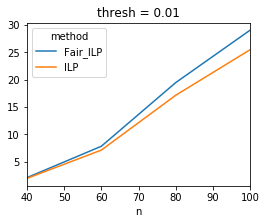

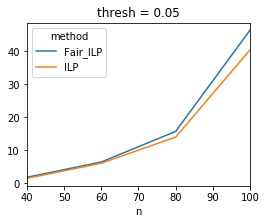

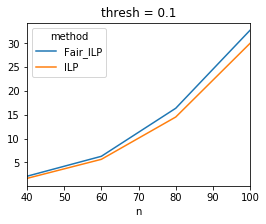

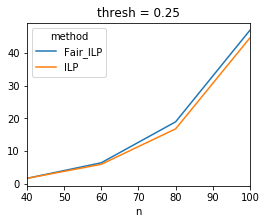

In [5]:
#ratio (or threshold) is the percentage of pairs allowed to favor one group
plt.rcParams["figure.figsize"] = (4,3)
x = logt[logt['n'] <200]
x = x[x['theta'] == 0.3]
x = x[x['p'] == 4.]
for r in np.sort(x['ratio'].unique()):
    y = x[x['ratio']==r]
    y.groupby(by=['n','method'])['time'].mean().unstack().plot(title="thresh = "+str(r))
    plt.show()

**Evaluate the impact of bias in base rankings on ILP**

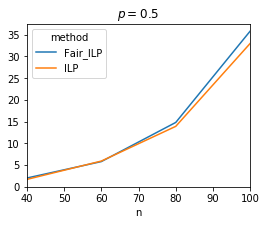

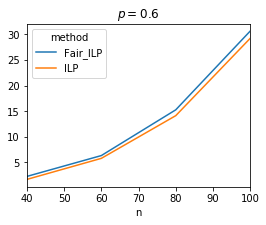

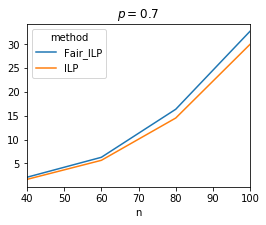

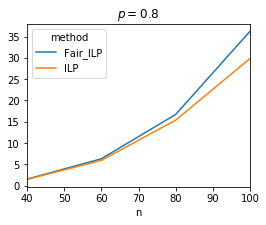

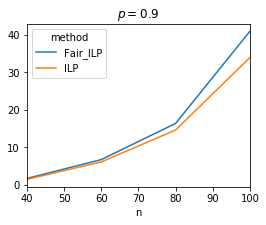

In [6]:
#p=.4 - >fairness param favoring one group p=0.7 (0.7 favoring G1 - 0.3 favoring G2 = 0.4)

plt.rcParams["figure.figsize"] = (4,3)
x = logt[logt['n'] <200]
x = x[x['theta'] == 0.3]
x = x[x['ratio'] == 0.1]
for p in x['p'].unique():
    y = x[x['p']==p]
    y.groupby(by=['n','method'])['time'].mean().unstack().plot(title=r'$p=$'+str((50+p*5)/100))
    plt.show()

**Evaluate the impact of agreement among rankings on ILP**

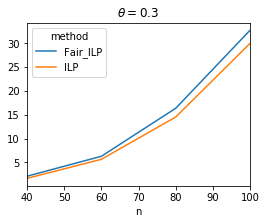

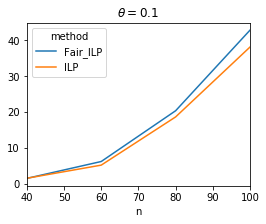

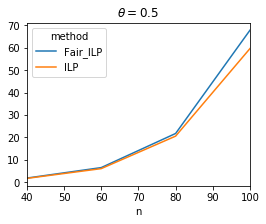

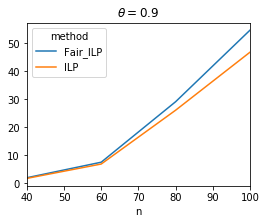

In [7]:
plt.rcParams["figure.figsize"] = (4,3)
x = logt[logt['n'] <200]
x = x[x['p'] == 4.]
x = x[x['ratio'] == 0.1]
for t in x['theta'].unique():
    y = x[x['theta']==t]
    y.groupby(by=['n','method'])['time'].mean().unstack().plot(title=r'$\theta=$'+str(t))
    plt.show()

**Evaluate the impact of bias in the base rankings on BB**

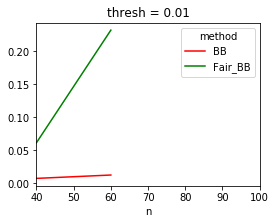

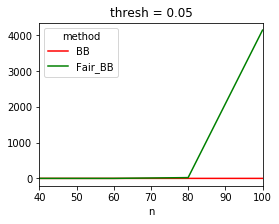

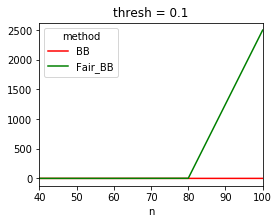

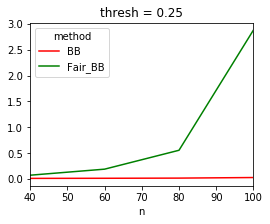

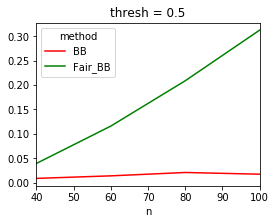

In [8]:
#missing values for BB methods are experiments where required resources exceeded the 50G heap size allowed
#ratio (or threshold) is the percentage of pairs allowed to favor one group
plt.rcParams["figure.figsize"] = (4,3)
x = logbb[logbb['theta'] == 0.3]
x = x[x['p'] == 4.]
for r in np.sort(logbb['ratio'].unique()):
    y = x[x['ratio']==r]
    ax =y.groupby(by=['n','method'])['time'].mean().unstack().plot(title="thresh = "+str(r),color=['red','green'])
    ax.set_xlim(40,100)
#     ax.set_ylim(0,5000)
    plt.show()

**compare fair_BB and fair_ILP time and variance across runs**

**Evaluate the impact of bias in the base rankings on BB**

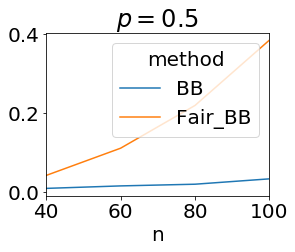

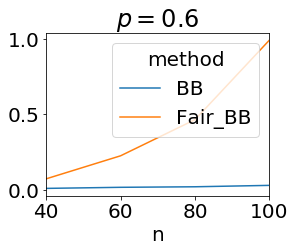

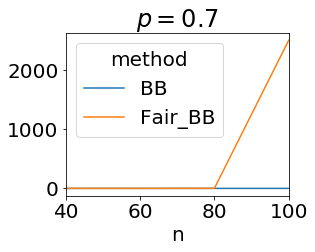

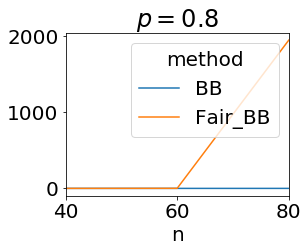

In [10]:
#p=.4 - >fairness param favoring one group p=0.7 (0.7 favoring G1 - 0.3 favoring G2 = 0.4)

plt.rcParams["figure.figsize"] = (4,3)
x = logbb[logbb['n'] <200]
x = x[x['theta'] == 0.3]
x = x[x['ratio'] == 0.1]
for p in [0.,2.,4.,6.]:
    y = x[x['p']==p]
    y.groupby(by=['n','method'])['time'].mean().unstack().plot(title=r'$p=$'+str((50+p*5)/100))
    plt.show()

In [15]:
b = test[test['theta'] == 0.3]
b = b[b['p'] == 4.]
b = b[b['ratio'] == .25]
b = b[b['n'] < 200]
b.groupby(by=['n','method'])['time'].mean().unstack()[['ILP','Fair_ILP','BB','Fair_BB']]

method        ILP   Fair_ILP      BB  Fair_BB
n                                            
40       1.612917   1.614580  0.0113   0.0730
60       5.910001   6.377561  0.0134   0.1898
80      16.761077  18.904661  0.0166   0.5553
100     44.605485  46.934961  0.0279   2.8793

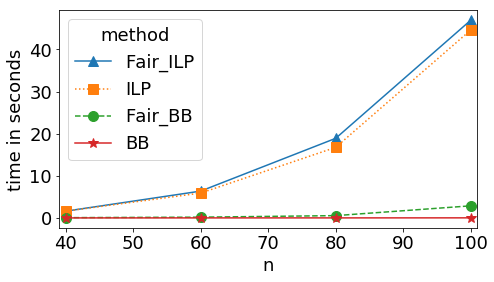

In [17]:
plt.rcParams["figure.figsize"] = (7.5,4)
plt.rcParams["font.size"] = 18
b = test[test['theta'] == 0.3]
b = b[b['p'] == 4.]
b = b[b['ratio'] == .25]
b = b[b['n'] < 200]
ax = b.groupby(by=['n','method'])['time'].mean().unstack()[['Fair_ILP','ILP','Fair_BB','BB']].plot(style=['^-', 's:', 'o--', '*-'], ms=10)
ax.set_xlim((39,101))
ax.set_ylabel("time in seconds")
plt.savefig("bb_ilp.pdf", bbox_inches='tight')

**Compare all param settings ILP and BB**

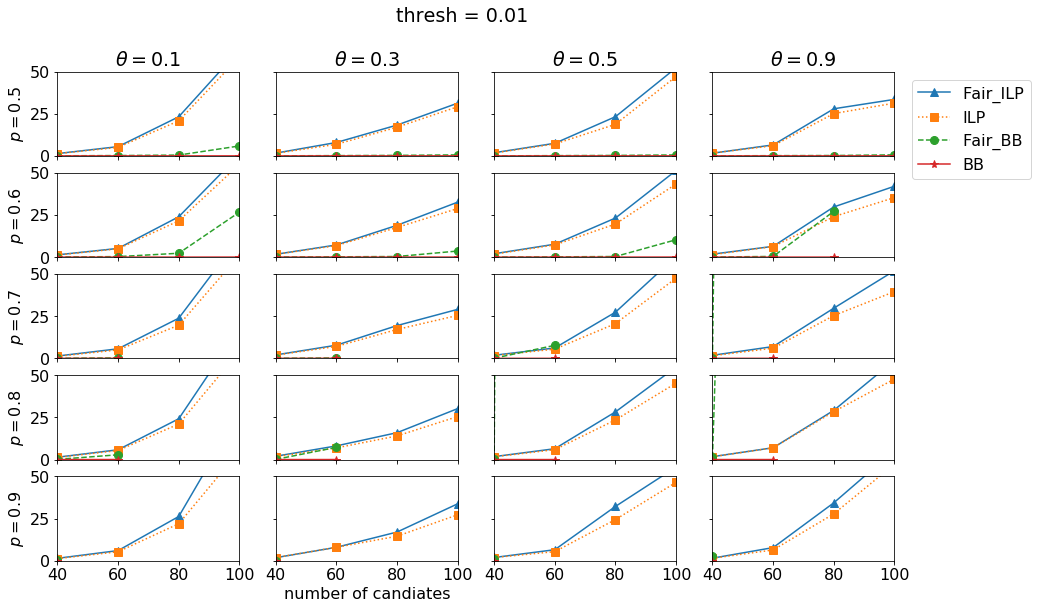

<Figure size 1080x648 with 0 Axes>

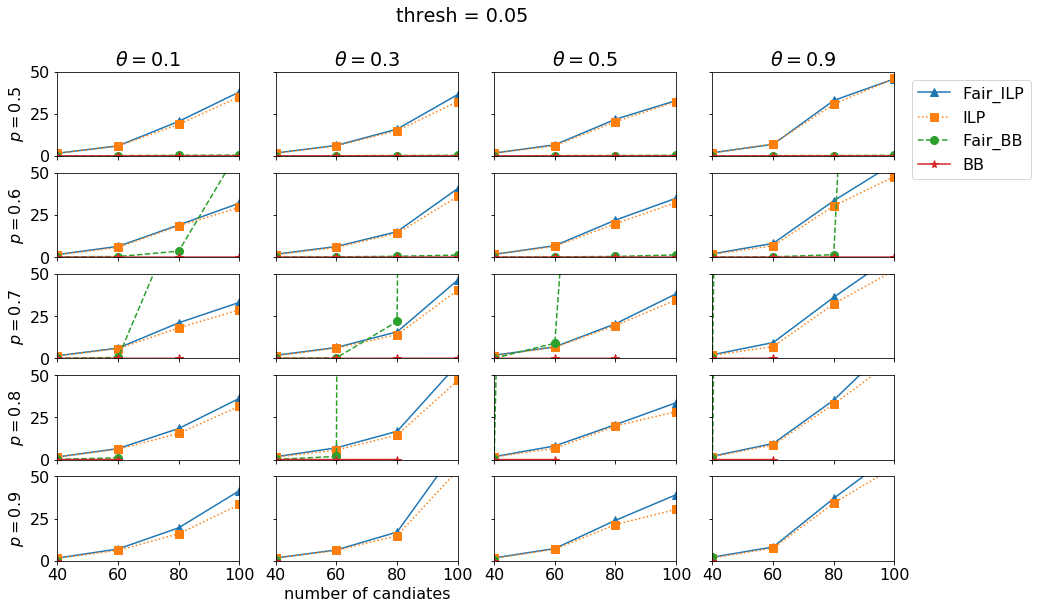

<Figure size 1080x648 with 0 Axes>

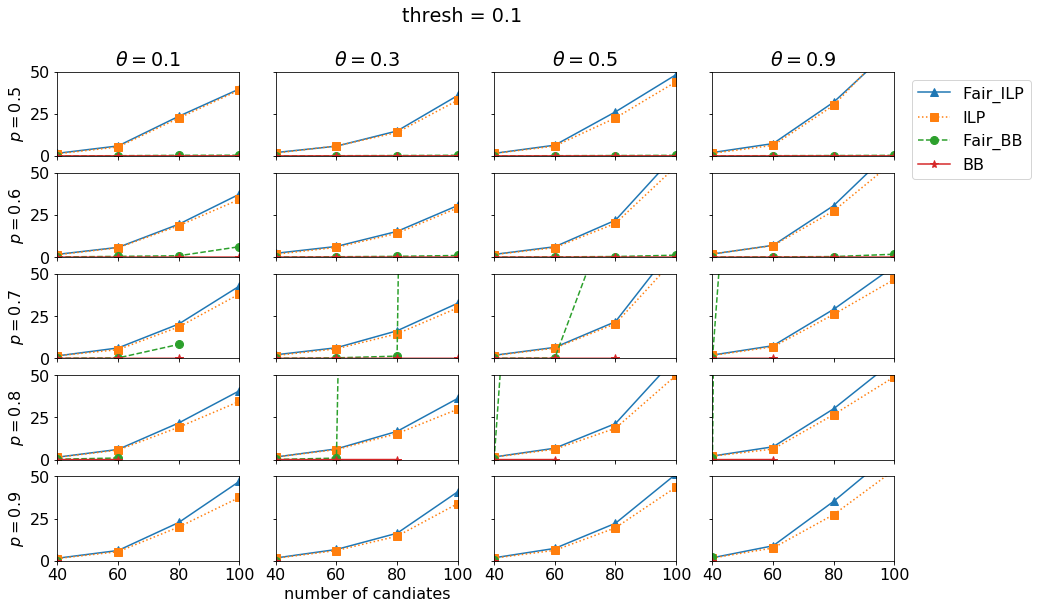

<Figure size 1080x648 with 0 Axes>

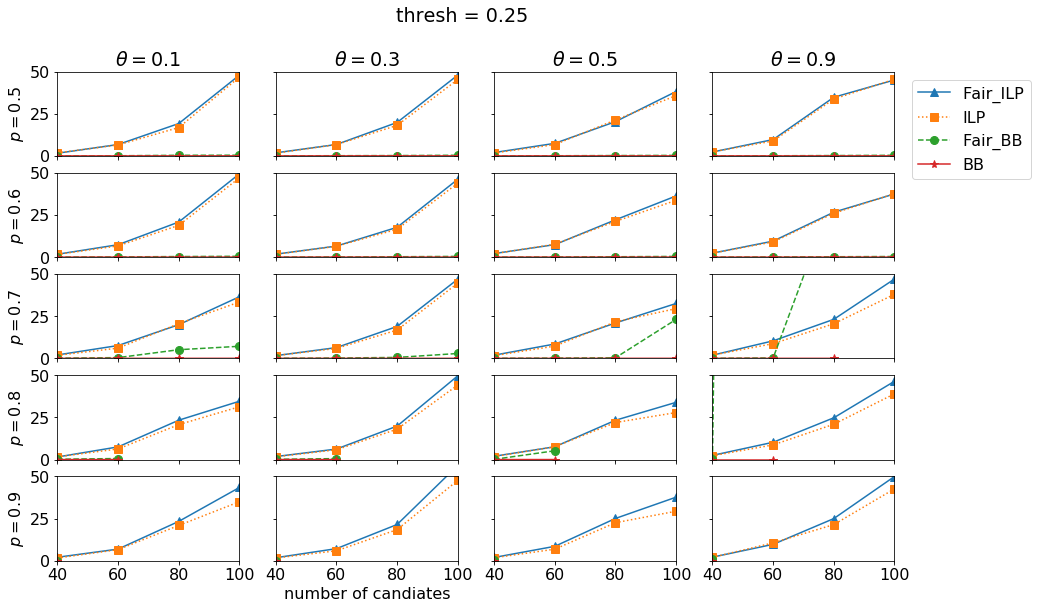

<Figure size 1080x648 with 0 Axes>

In [19]:
plt.rcParams["figure.figsize"] = (15,9)
plt.rcParams["font.size"] = 16
for r in [0.01, 0.05, 0.1,0.25]:
    fig, axes = plt.subplots(nrows=5, ncols=4, sharex=True, sharey=True)#, sharex='row')
    for i,p in enumerate([0., 2., 4.,6., 8.]):
    #     fig, axes[j] = plt.subplots(nrows=1, ncols=3, sharey=True)
        for j,theta in enumerate([0.1, 0.3, 0.5, 0.9]):
            b = test[test['theta'] == theta]
            b = b[b['p'] == p]
            b = b[b['ratio'] == r]
            b = b[b['n'] < 200]
            ax = b.groupby(by=['n','method'])['time'].mean().unstack()[['Fair_ILP','ILP','Fair_BB','BB']].plot(ax=axes[i][j],
                                                                                                               style=['^-', 's:', 'o--', '*-'],
                                                                                                               ms=8, 
                                                                                                               legend=None)
            axes[i][j].set_ylim((0,50))
            if j==0:
                axes[i][j].set_ylabel(r'$p=$'+str((50 +5*p)/100))
            if j==1:
                axes[i][j].set_xlabel("number of candiates")
            else:
                axes[i][j].set_xlabel("")
            if i == 0:
                axes[i][j].set_title(r"$\theta =$"+str(theta))
            if i == 0 and j == 3:
                axes[i][j].legend(bbox_to_anchor=(1.05, 1))
    fig.suptitle("thresh = "+str(r))
    plt.show()
    plt.clf()
#     plt.savefig("figures/fairvaccuracy.pdf",bbox_inches='tight')
